In [5]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.regularizers import l2

In [22]:
data_std = pd.read_csv("data/final/1min/BidAsk/BTC_std.csv")
Y = pd.read_csv("data/final/1min/BTC_Y_std.csv")

#data_std = pd.read_csv("data/final/1min/OrderFlow/BTC_std.csv")
#Y = pd.read_csv("data/final/1min/BidAsk/BTC_Y_std.csv")


#data_std = pd.read_csv("data/final/1min/HF/BTC_std.csv")
#Y = pd.read_csv("data/final/1min/BidAsk/BTC_Y_std.csv")

In [24]:
Y

,y
0,0
1,2
2,2
3,2
4,1
...,...
17043,1
17044,0
17045,2
17046,1


In [16]:
def CreateTestTrain(data_std, Y, window):
    r,x = data_std.shape
    
    dat = np.zeros((r-window, window, x))
    

    for i in range(r-window):
        dat[i,:,:] = data_std.iloc[i:i+window,:].values



    train = dat[:14000, :,:]
    val = dat[14000:15500, :,:]
    test = dat[15500:, :,:]

    Y_train = Y[window:14005]
    Y_val = Y[14000 + window:15500 + window]
    Y_test = Y[15500 + window:]
    
    return train, val, test, Y_train, Y_val, Y_test
    
    

In [10]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[5, x]),
#keras.layers.Dense(256, activation="relu"),
#keras.layers.Dropout(0.2), 
#keras.layers.Dense(128, activation="relu"),
#keras.layers.Dropout(0.15), 
keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
keras.layers.Dropout(0.1), 
keras.layers.Dense(32, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
keras.layers.Dropout(0.05), 
keras.layers.Dense(16, activation="relu"),
keras.layers.Dense(8, activation="relu"),
keras.layers.Dense(4, activation="relu"),

SyntaxError: unexpected EOF while parsing (<ipython-input-10-4313b9157629>, line 13)

In [36]:
def Model_1(train,val,test,Y_train,Y_val, Y_test, EP, window, x):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[window, x]),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
    ])
    
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(train, Y_train, epochs=EP, validation_data = (val,Y_val))
    
    return history, model
    

In [37]:
def Model_2(train,val,test,Y_train,Y_val, Y_test, EP, window, x):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[window, x]),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
    ])
        
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(train, Y_train, epochs=EP, validation_data = (val,Y_val))
    
    return history, model
    

In [38]:
def Model_3(train,val,test,Y_train,Y_val, Y_test, EP, window, x):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[window, x]),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
    ])
        
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(train, Y_train, epochs=EP, validation_data = (val,Y_val))
    
    return history, model

In [43]:
def Run_Dense(data_std, Y, name, window = 5, EP = 50):
    r,x = data_std.shape
    
    train, val, test, Y_train, Y_val, Y_test = CreateTestTrain(data_std, Y, window)
    
    His1, Mod1 = Model_1(train,val,test,Y_train,Y_val, Y_test, EP, window, x)
    His2, Mod2 = Model_2(train,val,test,Y_train,Y_val, Y_test, EP, window, x)
    His3, Mod3 = Model_3(train,val,test,Y_train,Y_val, Y_test, EP, window, x)
    
    
    return test, Y_test, His1, His2, His3, Mod1, Mod2, Mod3

In [45]:
test, Y_test, His1, His2, His3, Mod1, Mod2, Mod3 = Run_Dense(data_std, Y, "test")

Epoch 1/50
438/438 [==============================] - 1s 1ms/step - loss: 1.1564 - accuracy: 0.4722 - val_loss: 1.1118 - val_accuracy: 0.3967
Epoch 2/50
438/438 [==============================] - 0s 929us/step - loss: 0.9913 - accuracy: 0.5631 - val_loss: 1.1196 - val_accuracy: 0.4100
Epoch 3/50
438/438 [==============================] - 0s 966us/step - loss: 0.9770 - accuracy: 0.5712 - val_loss: 1.1142 - val_accuracy: 0.4067
Epoch 4/50
438/438 [==============================] - 0s 959us/step - loss: 0.9754 - accuracy: 0.5693 - val_loss: 1.1201 - val_accuracy: 0.4060
Epoch 5/50
438/438 [==============================] - 0s 976us/step - loss: 0.9720 - accuracy: 0.5679 - val_loss: 1.1215 - val_accuracy: 0.4100
Epoch 6/50
438/438 [==============================] - 0s 930us/step - loss: 0.9678 - accuracy: 0.5734 - val_loss: 1.1180 - val_accuracy: 0.4060
Epoch 7/50
438/438 [==============================] - 0s 982us/step - loss: 0.9722 - accuracy: 0.5638 - val_loss: 1.1134 - val_accuracy: 0

438/438 [==============================] - 0s 1ms/step - loss: 0.9532 - accuracy: 0.5772 - val_loss: 1.0832 - val_accuracy: 0.4447
Epoch 9/50
438/438 [==============================] - 0s 970us/step - loss: 0.9568 - accuracy: 0.5763 - val_loss: 1.0822 - val_accuracy: 0.4553
Epoch 10/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9557 - accuracy: 0.5783 - val_loss: 1.0899 - val_accuracy: 0.4587
Epoch 11/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9520 - accuracy: 0.5796 - val_loss: 1.0808 - val_accuracy: 0.4553
Epoch 12/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9537 - accuracy: 0.5812 - val_loss: 1.0843 - val_accuracy: 0.4580
Epoch 13/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9549 - accuracy: 0.5761 - val_loss: 1.0907 - val_accuracy: 0.4640
Epoch 14/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9527 - accuracy: 0.5815 - val_loss: 1.0890 - val_accuracy: 0.4547
Epoch 15/5

438/438 [==============================] - 0s 1ms/step - loss: 0.9411 - accuracy: 0.5827 - val_loss: 1.1133 - val_accuracy: 0.4547
Epoch 16/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9484 - accuracy: 0.5775 - val_loss: 1.1227 - val_accuracy: 0.4473
Epoch 17/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9383 - accuracy: 0.5821 - val_loss: 1.1339 - val_accuracy: 0.4507
Epoch 18/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9454 - accuracy: 0.5765 - val_loss: 1.1152 - val_accuracy: 0.4480
Epoch 19/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9409 - accuracy: 0.5824 - val_loss: 1.1362 - val_accuracy: 0.4460
Epoch 20/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9466 - accuracy: 0.5798 - val_loss: 1.1502 - val_accuracy: 0.4447
Epoch 21/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9466 - accuracy: 0.5749 - val_loss: 1.1159 - val_accuracy: 0.4500
Epoch 22/50

In [41]:
Mod1

In [42]:
Mod1.predict(test)

NameError: name 'test' is not defined

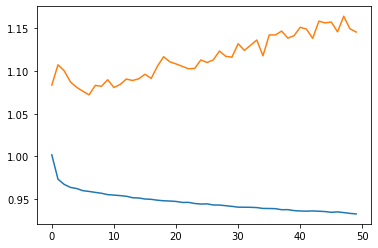

In [47]:
plt.plot(His2.history["loss"])
plt.plot(His2.history["val_loss"])

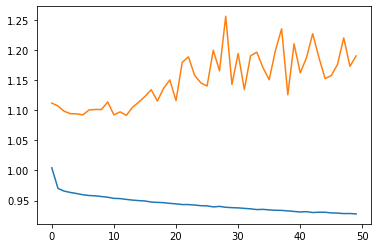

In [48]:
plt.plot(His3.history["loss"])
plt.plot(His3.history["val_loss"])

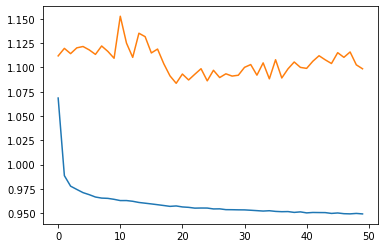

In [46]:
plt.plot(His1.history["loss"])
plt.plot(His1.history["val_loss"])

In [49]:
### Accuracy ###
pred = np.argmax(Mod1.predict(test), axis=-1)
n = pred.shape[0]

sum(pred == Y_test.iloc[:,0]) / n

0.37848347375243035

In [50]:
### Accuracy ###
pred = np.argmax(Mod2.predict(test), axis=-1)
n = pred.shape[0]

sum(pred == Y_test.iloc[:,0]) / n

0.37005832793259885

In [51]:
### Accuracy ###
pred = np.argmax(Mod3.predict(test), axis=-1)
n = pred.shape[0]

sum(pred == Y_test.iloc[:,0]) / n

0.3836681788723266

In [54]:
import sklearn
from sklearn.metrics import roc_auc_score

In [55]:
pred = Mod1.predict(test)
roc_auc_score(pd.get_dummies(Y_test), pred, multi_class="ovr")

0.5570072097420699

In [56]:
pred = Mod2.predict(test)
roc_auc_score(pd.get_dummies(Y_test), pred, multi_class="ovr")

0.545774843339723

In [57]:
pred = Mod3.predict(test)
roc_auc_score(pd.get_dummies(Y_test), pred, multi_class="ovr")

0.5451939332823635